# Final Project Data Analysis

In [21]:
# Initialize packages to be used, enable matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import csv
import pywt

### Haar Wavelet Python Example

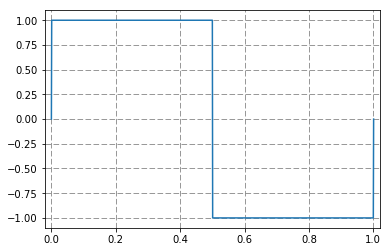

In [25]:
w = pywt.Wavelet('Haar')
phi, psi, x = w.wavefun(level=10)

fig, ax = plt.subplots()
ax.set_xlim(-.02, 1.02)
ax.grid(color='grey', linestyle='--')
ax.plot(x, psi);

### Data Cleaning
For the final project a significant amount of data had to be analyzed. The data we will be analyzing was obtained from the console log of the web application and placed into a text file. For ease of integer parsing, the X, Y and time step of each value are not correlated and are simply listed in order. Correlating them together is part of the initial cleaning of data.

In [3]:
# First we start by turning our text file lines into a clean list
f = open("data/base_trial.csv")
empty_list = []
for row in f:
    i = int(row.strip())
    empty_list.append(i)

# Now let's do a test print for verification
print(empty_list[0: 27])

[166, 19, 13217713, 161, 25, 13217729, 154, 38, 13217755, 147, 54, 13217771, 128, 95, 13217793, 110, 132, 13217814, 107, 143, 13217837, 107, 152, 13217845, 113, 189, 13217880]


In [4]:
# Now that we have our initial list, we need to organize the data
# into individual correlated arrays
complete_list = [empty_list[x:x+3] for x in range(0, len(empty_list),3)]

# Now let's do another small test print for verification
print(complete_list[0:9])

[[166, 19, 13217713], [161, 25, 13217729], [154, 38, 13217755], [147, 54, 13217771], [128, 95, 13217793], [110, 132, 13217814], [107, 143, 13217837], [107, 152, 13217845], [113, 189, 13217880]]


In [5]:
# Very nice! Now that we have the data in correlated arrays, lets combine it
# all together in a function so that we don't need to re-do this every time.
def dataClean(file):
    f = open(file)
    empty_list = []
    for row in f:
        i = int(row.strip())
        empty_list.append(i)
    complete_list = [empty_list[x:x+3] for x in range(0, len(empty_list),3)]
    return complete_list

In [6]:
# Now that the data has been reduced into a function, clean data from the
# console output can be produced on the fly!
print(dataClean("data/base_trial.csv")[1:9])

[[161, 25, 13217729], [154, 38, 13217755], [147, 54, 13217771], [128, 95, 13217793], [110, 132, 13217814], [107, 143, 13217837], [107, 152, 13217845], [113, 189, 13217880]]


In [7]:
# The function can be utilized for both .csv and .txt files without need
# to change anything. CSVs could potentially be useful in the future for
# removing or changing large pieces of data to introduce outlier behavior.
print(dataClean("data/base_trial.txt")[1:9])

[[161, 25, 13217729], [154, 38, 13217755], [147, 54, 13217771], [128, 95, 13217793], [110, 132, 13217814], [107, 143, 13217837], [107, 152, 13217845], [113, 189, 13217880]]


### Data Plotting
Now that we have clean/useful data, we can proceed to plot it.

In [16]:
# Building plotting function
def plot(file):
    working_list = dataClean(file)
    name = file
    x, y, t = [], [], []
    for i in working_list:
        x.append(i[0])
        # y is flipped in the 
        y.append(800-i[1])
        t.append(i[2])
    plt.title(file)
    plt.xlabel('X-position')
    plt.xlim([0,800])
    plt.ylim([0,800])
    plt.ylabel('Y-position')
    return plt.scatter(x,y, s=0.05)

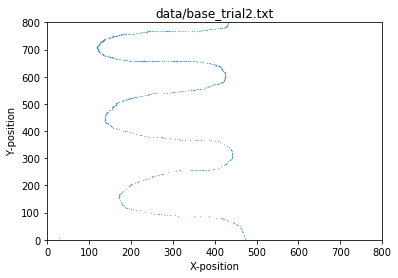

In [17]:
trial2 = plot(("data/base_trial2.txt"))

Lets compare our data plotting to the true drawing from the web application:
![drawing](pictures/base_trial2.PNG)
Looks about right!

### Filtering

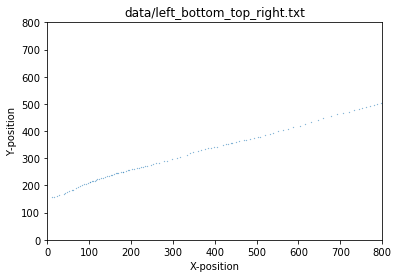

In [26]:
# Plot some data initially
data1 = plot(("data/left_bottom_top_right.txt"))